In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
w = bd.BDWorld(Real3(1, 2, 3))
w.add_molecules(Species("A", "0.005", "0"), 120)
w.add_molecules(Species("B", "0.005", "0"), 120, AABB(Real3(0, 1, 1.5), Real3(0.5, 2, 2.5)))

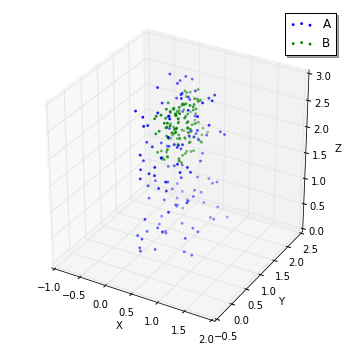

In [3]:
_ = viz.plot_world_with_matplotlib(w)

In [4]:
with species_attributes():
    A | B | C | {"D": "1", "radius": "0.005"}

with reaction_rules():
    A + B == C | (0.01, 0.3)

m = get_model()

In [5]:
factory = spatiocyte.SpatiocyteFactory(0.005)

In [6]:
w = factory.create_world(Real3(1, 1, 1))
w.bind_to(m)
w.add_molecules(Species("A"), 60, AABB(Real3(0, 0, 0), Real3(0.5, 1, 1)))
w.add_molecules(Species("B"), 60, AABB(Real3(0.5, 0, 0), Real3(1, 1, 1)))

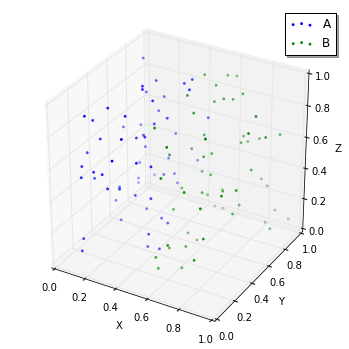

In [7]:
_ = viz.plot_world_with_matplotlib(w)

In [10]:
sim = factory.create_simulator(w)
obs1 = FixedIntervalHDF5Observer(1e-3, "test%03d.h5")
sim.run(0.05, obs1)

In [14]:
viz.plot_movie_with_matplotlib([load_world("test%03d.h5" % _) for _ in xrange(50)])

Start generating species_list ...
Start preparing mplot3d ...
Start making animation ...
Start generating a movie ...
